In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import *
from sklearn.metrics import accuracy_score
from keras.layers import Input, Dense, Flatten
from numpy import argmax

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [28]:
x_train.shape
y_train.shape
y_test.shape
y_train[0:10]

(50000, 1)

[1]


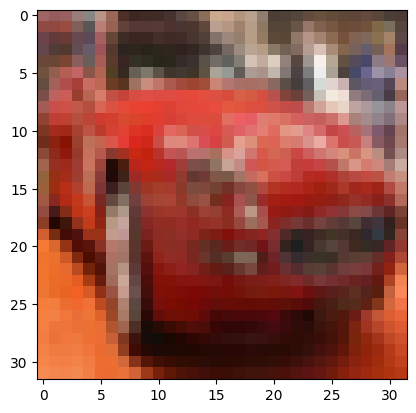

In [4]:
plt.imshow(x_train[5],cmap="gray")
print(y_train[5])

In [5]:
# if we use this, we shoudl put loss in compile (catecorical_crossentropy)
# num_classes = 10
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
# print(y_train[0])

In [6]:
# x_train_final = x_train.reshape(-1, 3072)
# x_train_final.shape

In [7]:
# x_test_final = x_test.reshape(-1, 3072)
# x_test_final.shape

In [8]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [9]:
model = keras.Sequential()

In [10]:
# model.add(Input(shape=(32,32,3)))
# # model.add(Input(batch_shape=(32,28,28,1)))
# model.add(Input(shape=(32,32,3)))

# model.add(Conv2D(filters=6,kernel_size = 5,activation = 'relu'))

# # model.add(Conv2D(filters=6,kernel_size = 5,activation = 'relu',input_shape = (32,32,3)))

# model.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))

# model.add(Conv2D(filters=16,kernel_size = 5, activation = 'relu'))

# model.add(MaxPool2D(pool_size=(2,2), strides = (2,2), ))

# model.add(Flatten())
# model.add(Dense(120,activation = 'relu'))
# model.add(Dense(84,activation = 'relu'))
# model.add(Dense(10,activation = 'softmax'))
# model.summary()

In [11]:
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
results= model.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(x_test, y_test), )

Epoch 1/20
391/391 [==============================] - 19s 18ms/step - loss: 1.9524 - accuracy: 0.2493 - val_loss: 1.6113 - val_accuracy: 0.3964
Epoch 2/20
391/391 [==============================] - 6s 14ms/step - loss: 1.4945 - accuracy: 0.4523 - val_loss: 1.2498 - val_accuracy: 0.5481
Epoch 3/20
391/391 [==============================] - 6s 14ms/step - loss: 1.2820 - accuracy: 0.5420 - val_loss: 1.0844 - val_accuracy: 0.6093
Epoch 4/20
391/391 [==============================] - 6s 15ms/step - loss: 1.1651 - accuracy: 0.5879 - val_loss: 1.0026 - val_accuracy: 0.6361
Epoch 5/20
391/391 [==============================] - 5s 14ms/step - loss: 1.0633 - accuracy: 0.6265 - val_loss: 0.9124 - val_accuracy: 0.6784
Epoch 6/20
391/391 [==============================] - 6s 15ms/step - loss: 0.9956 - accuracy: 0.6545 - val_loss: 0.8764 - val_accuracy: 0.6949
Epoch 7/20
391/391 [==============================] - 5s 14ms/step - loss: 0.9331 - accuracy: 0.6783 - val_loss: 0.8436 - val_accuracy: 0.705

In [13]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6522 - accuracy: 0.7797


In [14]:
y_pred=model.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 4ms/step


(10000, 10)

In [15]:
y_pred1=argmax(y_pred,axis=1)

In [16]:

accuracy_score(y_test,y_pred1)*100

77.97

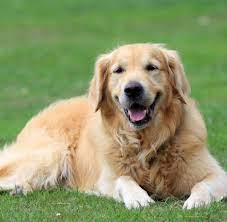

In [35]:
img = keras.utils.load_img('dog2.jpg')
img

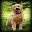

In [36]:
img = keras.utils.load_img('dog3.jpeg', target_size = (32, 32))
img

In [37]:
img1 = keras.utils.img_to_array(img)
img1.shape

(32, 32, 3)

In [38]:
img1 = img1/255
img1 = np.expand_dims(img, axis = 0) # axis is indicate place of one
img1.shape

(1, 32, 32, 3)

In [39]:
np.argmax(model.predict(img1), axis = 1)

1/1 [==============================] - 0s 22ms/step


array([1])

In [40]:
# extract output from any conv layer
model.inputs

[<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'conv2d_input')>]